<a href="https://colab.research.google.com/github/dak-sh-kim/selfstudy-wikidocs-tensorflow-nlp-tutorial-notebooks/blob/main/20220619_NLP_2_10)_Text_Preprocessing_Tools_for_Korean_Text_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10) 한국어 전처리 패키지 (Text Preprocessing Tools for Korean Text)

- 유용한 한국어 전처리 패키지를 정리해 봅시다.
- 앞서 소개한 형태소/문장 토크나이징 도구들인 KoNLPy, KSS(Korean Sentence Splitter)와 함께 유용하게 사용할 수 있는 패키지들

## 1. PyKoSpacing

- 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지
- 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델

In [ ]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-tbtv1s7e
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-tbtv1s7e
     \ 671.4 MB 10.0 MB/s
     |████████████████████████████████| 1.3 MB 6.1 MB/s 
     |████████████████████████████████| 463 kB 46.2 MB/s 
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268577 sha256=06b88c31ee9628c17827b23a4f878280388adf4f1ae4c71fc864760a0639f4fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-bxateawz/wheels/9b/93/81/a2a7dc8c66ede5bf30634d20635f32b95eac7ca2ea8844058b
Successfully built pykospacing
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found exi

In [ ]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

- 임의의 문장을 띄어쓰기가 없는 문장으로 만들기

In [ ]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장을 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


- 다시 PykoSpacing 의 입력으로 사용하여 원 문장과 비교

In [ ]:
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent)

print(sent)
print(kospacing_sent)

김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


## 2. Py-Hanspell

- 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지

In [ ]:
pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-c83u47lp
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-c83u47lp
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=0e0e02717937ded2762df86f527b4c176483088b6795c869f5ddf8ede4e03916
  Stored in directory: /tmp/pip-ephem-wheel-cache-6hccwum0/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지"

spelled_sent = spell_checker.check(sent)
hanspell_sent = spelled_sent.checked

In [ ]:
print(spelled_sent) # 고치게 되는 과정들 (original, checked, error count, error details)

Checked(result=True, original='맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지', checked='맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지', errors=2, words=OrderedDict([('맞춤법', 0), ('틀리면', 0), ('왜', 1), ('안돼?', 1), ('쓰고', 1), ('싶은', 1), ('대로', 1), ('쓰면', 1), ('되지', 1)]), time=0.4041907787322998)


In [ ]:
spelled_sent.checked

'맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지'

- 띄어쓰기도 보정함 (PyKoSpacing 에 사용한 예제를 그대로 사용)
- PyKoSpacing과 결과가 거의 비슷하지만 조금 다름

In [ ]:
spelled_sent = spell_checker.check(new_sent)
hanspell_sent = spelled_sent.checked

In [ ]:
print(hanspell_sent)
print(kospacing_sent)

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


## 3. SOYNLP를 이용한 단어 토큰화

- soynlp: 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저
- ***"비지도학습" 으로 단어 토큰화를 한다는 특징 (***어떻게 한다는 거지?)
- 데이터 자주 등장하는 단어들을  -->  단어로 분석
- *** 내부적으로 단어 점수표로 동작 (응집 확률(cohesion probability)과 브랜칭 엔트로피(branching entropy)활용)

In [ ]:
pip install soynlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 4.2 MB/s 


### 1. 신조어 문제

- 기존 형태소 분석기의 문제: 신조어, 형태소 분석기에 등록되지 않은 단어는 제대로 구분하지 못함

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.8 MB/s 
     |████████████████████████████████| 453 kB 42.4 MB/s 


In [ ]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


*** soynlp의 아이디어 ***

1) 텍스트 데이터에서 특장 문자 시퀀스가 함께 자주 등장하는 빈도가 높다
  - ex. 에이비식스라는 문자열이 자주 연결되어 등장하면 한 단어라고 판단

2) 앞, 뒤 조사 or 완전히 다른 단어가 등장하는 것을 고려(*???) 해 해당 문자 시퀀스를 형태소라고 판단
  - ex. 에이비식스라는 단어 앞, 뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속 등장한다면 에이비식스를 한 단어로 파악하는 식

### 2. 학습하기

- soynlp는 기본적으로 학습에 기반한 토크나이저 이므로, 학습에 필요한 한국어 문서를 다운로드

In [ ]:
import soynlp

In [ ]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7fe5736acb50>)

- 훈련데이터를 다수의 문서로 분리

In [ ]:
# 훈련데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus('2016-10-20.txt')
len(corpus)

30091

- 총 3만 91개의 문서가 존재. 상위 3개의 문서만 출력(중략)

In [ ]:
i = 0

for document in corpus:
  if len(document) > 0:
    print(document)
    i = i + 1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

- soynlp는 학습 기반의 단어 토크나이저이므로, 기존 KoNLPy 제공 형태소 분석기와는 달리 학습과정을 거쳐야 함
- ** 즉,  전체 코퍼스로부터 1) 응집확률과 2) 브랜칭 엔트로피 단어 점수표를 만드는 과정
- WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산

In [ ]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.843 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


### 3. SOYNLP의 응집 확률(cohesion probability)

- 응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지 판단하는 척도 (즉, *** 얼마나 뭉쳐있는지 *** )
- 문자 단위로 내부 문자열 만드는 과정에서, 왼쪽부터 문자 추가하면서,
- 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱
- *** 응집확률 높을수록 전체 코퍼스에서 이 문자열시퀀스는 하나의 단어로 등장 가능성 높음 *** 

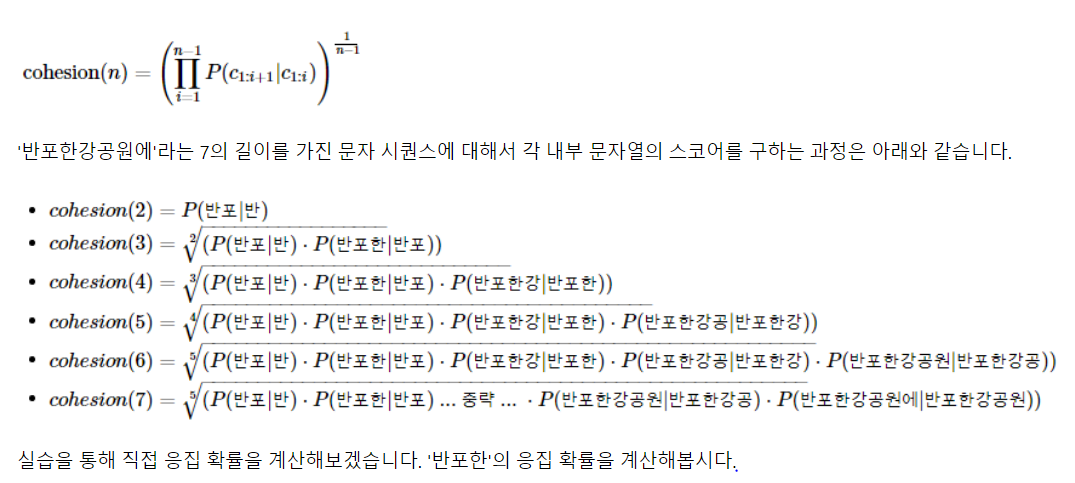

In [ ]:
word_score_table['반포한'].cohesion_forward

0.08838002913645132

In [ ]:
word_score_table['반포한강'].cohesion_forward

0.19841268168224552

In [ ]:
word_score_table['반포한강공'].cohesion_forward

0.2972877884078849

In [ ]:
word_score_table['반포한강공원'].cohesion_forward
  # 결합도는 '반포한강공원'일 때가 가장 높았음
  # 응집도를 통해 판단하기에 하나의 단어로 판단하기 가장 적합한 문자열은 '반포 한강공원' 이라 할 수 있음

0.37891487632839754

In [ ]:
word_score_table['반포한강공원에'].cohesion_forward

0.33492963377557666

### 4. SOYNLP의 브랜칭 엔트로피(branching entropy)

- Branching Entropy는 확률 분포의 엔트로피 값을 사용 
- 즉, 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지 판단하는 척도
- Branching Entropy := 주어진 문자 시퀀스에서 다음 문자 예측을 위해 *** 헷갈리는 정도 ***
- 값은 하나의 완성된 단어에 가까워질수록 점점 줄어듦 (하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 됨)

In [ ]:
word_score_table['디스'].right_branching_entropy
  # '디스' 다음에는 다양한 문자가 올 수 있어 1.63이라는 값을 가짐

1.6371694761537934

In [ ]:
word_score_table['디스플'].right_branching_entropy
  # '디스플' 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백함
  # 헷갈릴 일이 없음

-0.0

In [ ]:
word_score_table['디스플레'].right_branching_entropy

-0.0

In [ ]:
word_score_table['디스플레이'].right_branching_entropy
  # 갑자기 값이 증가 (0.0 --> 3.14003,,)
  # '디스플레이' 다음에는 조사/다른 단어와 같이 다양한 경우
  # 명백하지 않음

3.1400392861792916

*** 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭엔트로피 값 증가 ***

### 5. SOYNLP 의 L Tokenizer

- 한국어는, 띄어쓰기 단위로 나눈 어절 토큰은 주로 L토큰 + R토큰의 형식을 가질 때가 많음
- ex. '공원에' --> '공원 + 에'
- ex. '공부하는' --> '공부 + 하는'
- L토크나이저: L토큰 + R토큰으로 나누되, 분리 기준은 '점수가 가장 높은 L토큰을 찾아내는 원리'

In [ ]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores = scores)
l_tokenizer.tokenize('국제사회와 우리의 노력들로 범죄를 척결하자', flatten = False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

### 6. 최대 점수 토크나이저

- 띄어쓰기가 되지 않는 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저
- 띄어쓰기가 되어 있지 않은 문장을 넣어 점수를 통해 토큰화된 결과 확인

In [ ]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores = scores)
maxscore_tokenizer.tokenize('국제사회와우리의노력들로범죄를척결하자')

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

## 4. SOYNLP를 이용한 반복되는 문자 정제

- SNS나 채팅 데이터와 같은 한국어 데이터는 ㅋㅋ, ㅎㅎ등 불필요한 연속 많음
- 모두 서로 다른 단어로 처리하는 것은 불필요함
- 이에 반복되는 것은 하나로 정규화 시켜 줌

In [ ]:
from soynlp.normalizer import *

- 이모티콘의 경우

In [ ]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


- 글자의 경우

In [ ]:
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


## 5. Customized KoNLPy

- 사용자 사전 추가하기(생각보다 복잡, 그나마 쉬운 Customized Konlpy)
- 형태소 분석기를 사용할 때 이런 상황에 봉착한다면 어떻게 할까?
- 형태소 분석 입력 : '은경이는 사무실로 갔습니다.'
- 형태소 분석 결과 : ['은', '경이', '는', '사무실', '로', '갔습니다', '.']
- '은경이'는 하나의 단어이기 때문에 분리하지 말라고 형태소 분석기에 알려줘야 함

In [ ]:
pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 881 kB 4.4 MB/s 
     |████████████████████████████████| 453 kB 36.1 MB/s 
     |████████████████████████████████| 19.4 MB 1.3 MB/s 


In [ ]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다.')

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

- Twitter의 add_dictionary('단어', '품사') 와 같은 형식으로 사전 추가

In [ ]:
twitter.add_dictionary('은경이', 'Noun')

In [ ]:
twitter.morphs('은경이는 사무실로 갔습니다')
 # '은경이' 하나의 토큰으로 인식

['은경이', '는', '사무실', '로', '갔습니다']